In [21]:
import pandas as pd

# Dataset Loading done
df = pd.read_csv("crop_yield_full.csv")

print("Shape:", df.shape)
df.head()


Shape: (4474, 16)


,crop,year,season,state,area,production,fertilizer,pesticide,yield,N,P,K,pH,avg_temp_c,total_rainfall_mm,avg_humidity_percent
0,maize,1997,kharif,Assam,19216.0,14721,1.828787e+06,5956.96,0.615652,60,18,38,5.8,22.41,1468.92,70.71
1,potato,1997,whole year,Assam,75259.0,671871,7.162399e+06,23330.29,7.561304,60,18,38,5.8,22.41,1468.92,70.71
2,rice,1997,autumn,Assam,607358.0,398311,5.780226e+07,188280.98,0.780870,60,18,38,5.8,22.41,1468.92,70.71
3,rice,1997,summer,Assam,174974.0,209623,1.665228e+07,54241.94,1.060435,60,18,38,5.8,22.41,1468.92,70.71
4,rice,1997,winter,Assam,1743321.0,1647296,1.659119e+08,540429.51,0.941304,60,18,38,5.8,22.41,1468.92,70.71


In [22]:
# Null val check
print("\n Missing Values per Column:")
print(df.isnull().sum())



 Missing Values per Column:
crop                    0
year                    0
season                  0
state                   0
area                    0
production              0
fertilizer              0
pesticide               0
yield                   0
N                       0
P                       0
K                       0
pH                      0
avg_temp_c              0
total_rainfall_mm       0
avg_humidity_percent    0
dtype: int64


In [23]:
# Analysis 
print("\n Descriptive Statistics:")
df.describe().T



 Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
year,4474.0,2.008878e+03,6.519183e+00,1997.00,2003.000000,2.009000e+03,2.015000e+03,2.020000e+03
area,4474.0,4.424594e+05,1.112150e+06,1.00,4670.750000,4.606300e+04,2.929025e+05,1.021652e+07
production,4474.0,2.779466e+06,1.154821e+07,0.00,20277.000000,1.428630e+05,9.901112e+05,1.796982e+08
fertilizer,4474.0,5.958558e+07,1.538504e+08,144.49,635952.307500,5.956395e+06,3.948479e+07,1.754789e+09
pesticide,4474.0,1.199639e+05,3.171417e+05,0.17,1221.720000,1.126478e+04,7.953459e+04,3.780111e+06
yield,4474.0,1.073519e+01,2.617542e+01,0.00,1.528651,2.395085e+00,6.365170e+00,9.898700e+02
N,4474.0,7.624318e+01,2.104831e+01,50.00,62.000000,7.200000e+01,8.375000e+01,1.500000e+02
P,4474.0,3.218976e+01,1.171908e+01,15.00,20.000000,3.500000e+01,4.200000e+01,5.500000e+01
K,4474.0,3.262025e+01,7.424255e+00,20.00,26.000000,3.300000e+01,3.800000e+01,5.000000e+01
pH,4474.0,6.609902e+00,7.276119e-01,5.50,5.900000,6.600000e+00,7.200000e+00,8.000000e+00


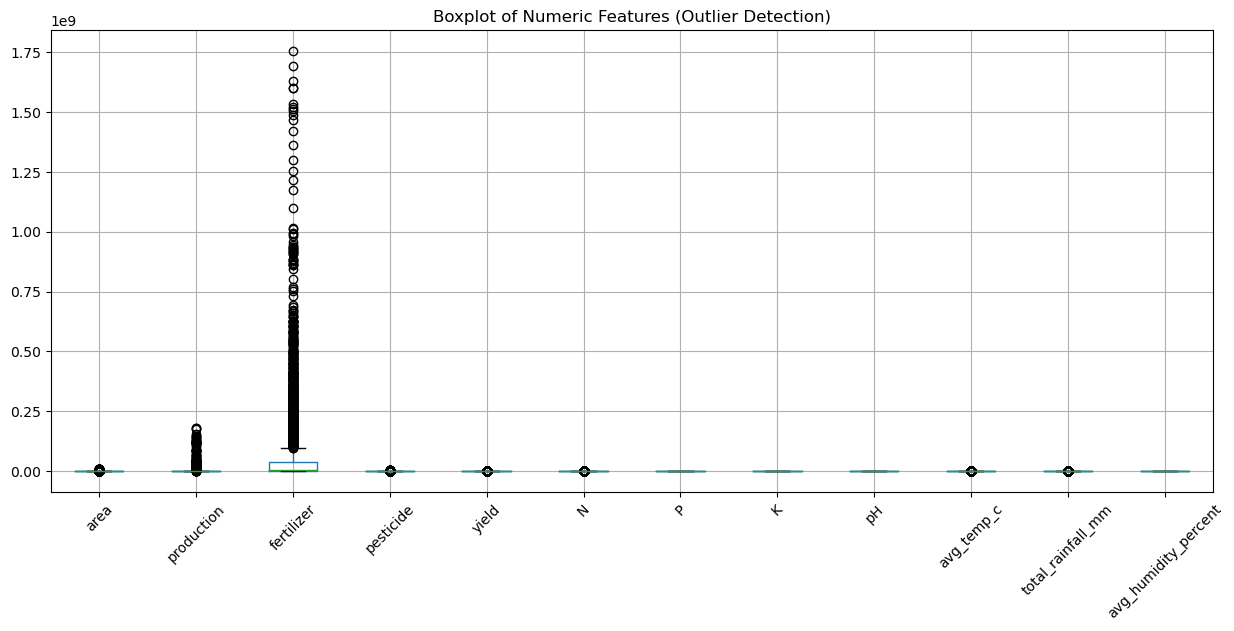

In [24]:
#EDA
import matplotlib.pyplot as plt

numeric_cols = ['area','production','fertilizer','pesticide','yield',
                'N','P','K','pH','avg_temp_c','total_rainfall_mm','avg_humidity_percent']

plt.figure(figsize=(15,6))
df[numeric_cols].boxplot(rot=45)
plt.title("Boxplot of Numeric Features (Outlier Detection)")
plt.show()


In [25]:
# IQR outlier detection algo
def detect_outliers(df, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices[col] = outliers.tolist()
    return outlier_indices

numeric_cols = ['area','production','fertilizer','pesticide','yield',
                'N','P','K','pH','avg_temp_c','total_rainfall_mm','avg_humidity_percent']

outliers = detect_outliers(df, numeric_cols)

# no of outlier in col
for col, idx in outliers.items():
    print(f"{col}: {len(idx)} outlier(s) detected")


area: 688 outlier(s) detected
production: 755 outlier(s) detected
fertilizer: 652 outlier(s) detected
pesticide: 645 outlier(s) detected
yield: 742 outlier(s) detected
N: 442 outlier(s) detected
P: 0 outlier(s) detected
K: 0 outlier(s) detected
pH: 0 outlier(s) detected
avg_temp_c: 205 outlier(s) detected
total_rainfall_mm: 160 outlier(s) detected
avg_humidity_percent: 0 outlier(s) detected


In [26]:
import numpy as np

# was mandatory to balance the major outlier so did log transformation to fix it
skewed_cols = ['area','production','fertilizer','pesticide']

for col in skewed_cols:
    df[col + '_log'] = np.log1p(df[col])

# Testing the log transform algo
df[['area','area_log','production','production_log','fertilizer','fertilizer_log','pesticide','pesticide_log']].head()


,area,area_log,production,production_log,fertilizer,fertilizer_log,pesticide,pesticide_log
0,19216.0,9.863551,14721,9.597098,1.828787e+06,14.419164,5956.96,8.692483
1,75259.0,11.228704,671871,13.417823,7.162399e+06,15.784356,23330.29,10.057551
2,607358.0,13.316875,398311,12.894991,5.780226e+07,17.872538,188280.98,12.145696
3,174974.0,12.072398,209623,12.253071,1.665228e+07,16.628057,54241.94,10.901228
4,1743321.0,14.371303,1647296,14.314646,1.659119e+08,18.926967,540429.51,13.200121


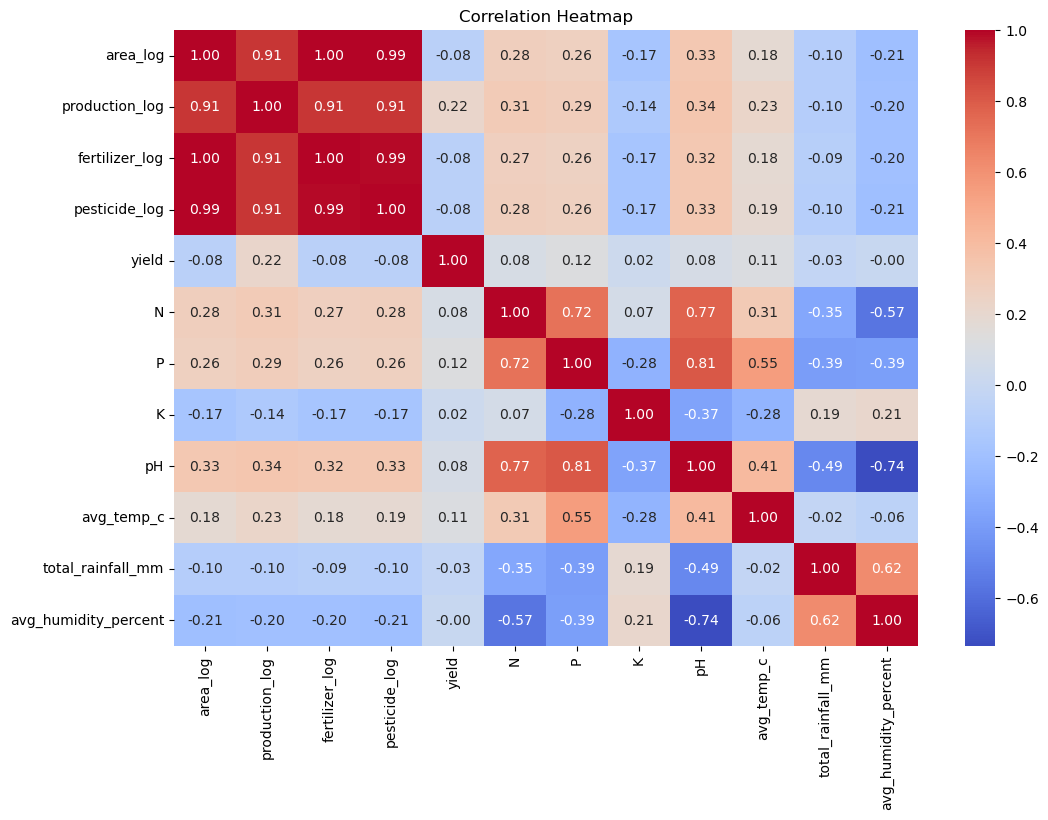

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrleation matrix , checking the corrleation between independent features
corr_cols = ['area_log','production_log','fertilizer_log','pesticide_log',
             'yield','N','P','K','pH','avg_temp_c','total_rainfall_mm','avg_humidity_percent']

corr = df[corr_cols].corr()

# Heatmap vis..
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


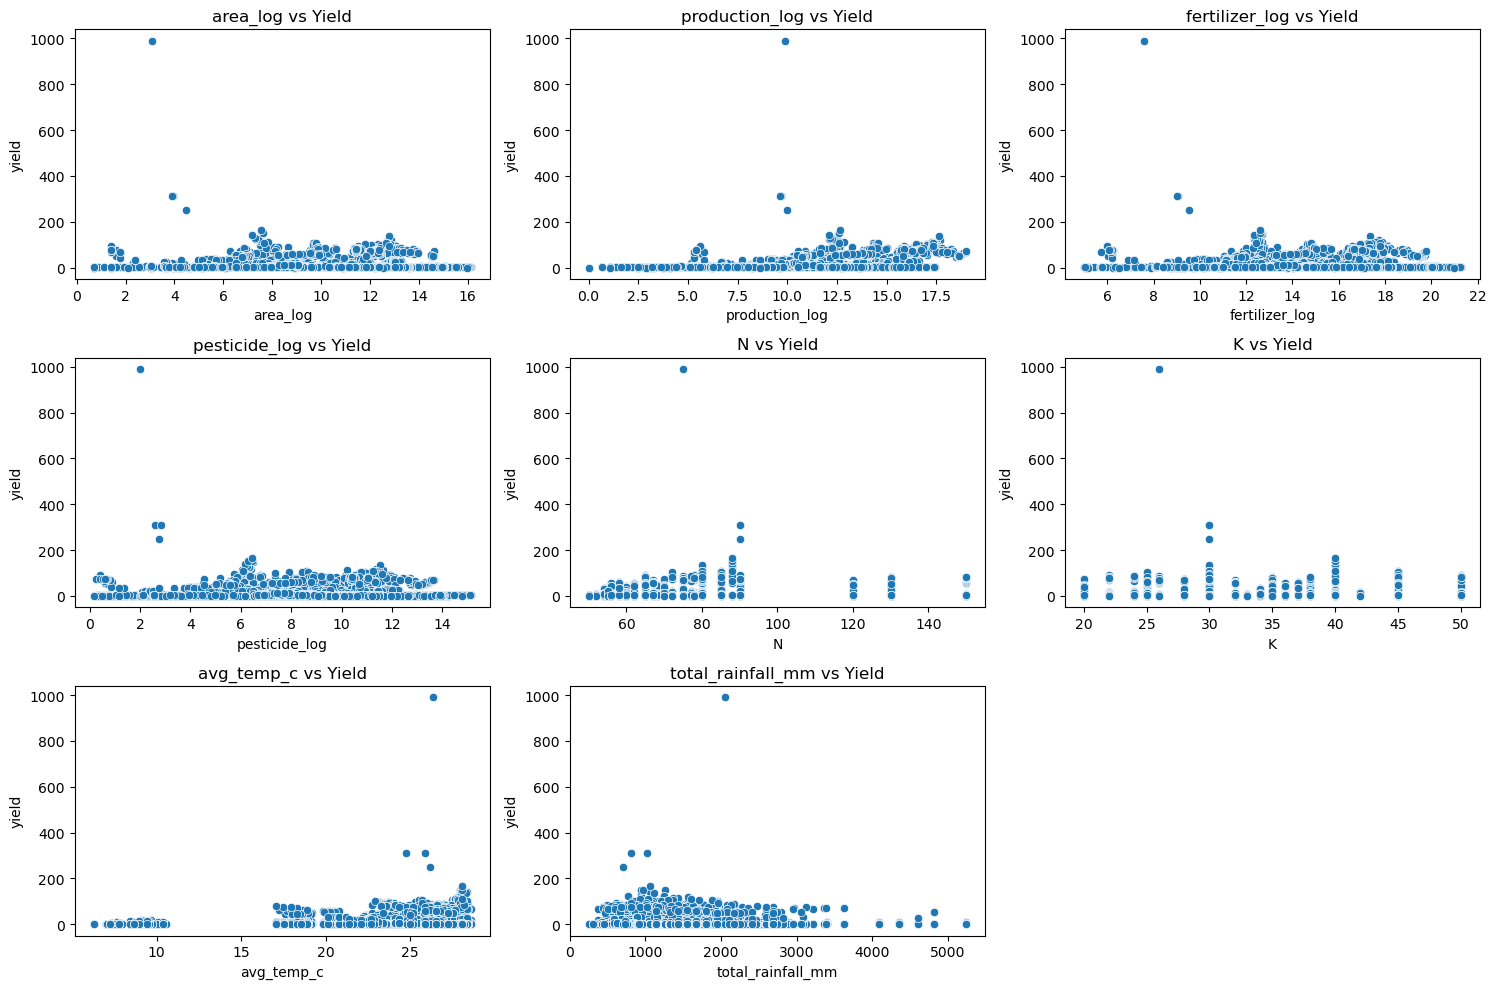

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = ['area_log','production_log','fertilizer_log','pesticide_log','N','K','avg_temp_c','total_rainfall_mm']

plt.figure(figsize=(15,10))
for i, col in enumerate(top_features, 1):
    plt.subplot(3,3,i)
    sns.scatterplot(x=df[col], y=df['yield'])
    plt.title(f'{col} vs Yield')
plt.tight_layout()
plt.show()


In [29]:
#Ps note that there is some tech issues related to crops count actually me 8 ni 5 ka kiya hu...

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# List of top crops
TOP_CROPS = ['rice', 'maize', 'potato', 'sugarcane', 'wheat', 'cotton', 'groundnut', 'soybean']

def train_best_model(df_crop):
    crop_name = df_crop['crop'].iloc[0]

    # One-hot encode categorical features
    df_encoded = pd.get_dummies(df_crop, columns=['season', 'state'], drop_first=True)
    
    # Features & target
    X = df_encoded.drop(columns=['yield', 'crop', 'area', 'production', 'fertilizer', 'pesticide'])
    y = df_encoded['yield']
    
    # Save feature columns for later prediction
    feature_columns = X.columns.tolist()
    joblib.dump(feature_columns, f"{crop_name}_features.pkl")
    print(f"✅ Saved feature columns for {crop_name}: {crop_name}_features.pkl")
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Random Forest
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
    
    # XGBoost
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
    
    # Select best model
    if r2_xgb > r2_rf:
        best_model = xgb_model
        print(f"{crop_name} → XGBoost selected (R2: {r2_xgb:.3f}, RMSE: {rmse_xgb:.3f})")
    else:
        best_model = rf
        print(f"{crop_name} → Random Forest selected (R2: {r2_rf:.3f}, RMSE: {rmse_rf:.3f})")
    
    return best_model

# Load your full dataset
df = pd.read_csv("crop_yield_full.csv")

# Filter crops with sufficient data
available_crops = [crop for crop in TOP_CROPS if df[df['crop'] == crop].shape[0] >= 10]

# Train & save models for each available crop
for crop in available_crops:
    df_crop = df[df['crop'] == crop].copy()
    model = train_best_model(df_crop)
    
    # Save the trained model
    joblib.dump(model, f"{crop}_best_model.pkl")
    print(f"✅ Saved trained model for {crop}: {crop}_best_model.pkl")


✅ Saved feature columns for rice: rice_features.pkl
rice → Random Forest selected (R2: 0.541, RMSE: 0.562)
✅ Saved trained model for rice: rice_best_model.pkl
✅ Saved feature columns for maize: maize_features.pkl
maize → XGBoost selected (R2: -0.007, RMSE: 70.794)
✅ Saved trained model for maize: maize_best_model.pkl
✅ Saved feature columns for potato: potato_features.pkl
potato → Random Forest selected (R2: 0.238, RMSE: 23.767)
✅ Saved trained model for potato: potato_best_model.pkl
✅ Saved feature columns for sugarcane: sugarcane_features.pkl
sugarcane → Random Forest selected (R2: 0.946, RMSE: 7.599)
✅ Saved trained model for sugarcane: sugarcane_best_model.pkl
✅ Saved feature columns for wheat: wheat_features.pkl
wheat → Random Forest selected (R2: 0.851, RMSE: 0.426)
✅ Saved trained model for wheat: wheat_best_model.pkl


In [31]:
# Output #2 basically recommendations part

In [32]:
import requests

def get_real_time_weather(city, api_key):
    """
    Fetch live weather data for a city in India using OpenWeatherMap API.
    
    Returns:
        avg_temp_c (float): Temperature in Celsius
        total_rainfall_mm (float): Rainfall in mm (last 1h)
        humidity_percent (float): Relative humidity %
    """
    try:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city},IN&appid={api_key}&units=metric"
        response = requests.get(url)
        response.raise_for_status()  # Raises HTTPError if status != 200 (not OK)
        data = response.json()
        
        avg_temp_c = float(data['main']['temp'])
        humidity_percent = float(data['main']['humidity'])
        total_rainfall_mm = float(data.get('rain', {}).get('1h', 0.0))
        
        return avg_temp_c, total_rainfall_mm, humidity_percent
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather data: {e}")
        # Return default values if API fails  ---  basiclly try catch for error detection
        return 25.0, 0.0, 70.0



In [33]:
def post_ml_recommendations(soil_moisture, rainfall_percent, humidity_percent):
    """
    Generate post-ML actionable recommendations based on sensor/weather data.
    
    Args:
        soil_moisture (float): Current soil moisture %
        rainfall_percent (float): Current rainfall as % of historical average
        humidity_percent (float): Current humidity %
    
    Returns:
        List[str]: Actionable recommendations
    """
    recommendations = []

    # Thresholds
    SOIL_MOISTURE_THRESHOLD = 20
    RAINFALL_THRESHOLD = 25
    HUMIDITY_THRESHOLD = 15

    if soil_moisture < SOIL_MOISTURE_THRESHOLD:
        recommendations.append(
            f"Soil moisture is {soil_moisture:.1f}% → Increase irrigation in next 3 days."
        )
    if rainfall_percent < RAINFALL_THRESHOLD:
        recommendations.append(
            f"Rainfall {rainfall_percent:.1f}% of average → Use supplemental irrigation."
        )
    if humidity_percent > HUMIDITY_THRESHOLD:
        recommendations.append(
            f"Humidity is {humidity_percent:.1f}% → Possible fungal outbreak → Preventive fungicide spray suggested."
        )
    if not recommendations:
        recommendations.append("No immediate action required.")

    return recommendations


In [34]:
def prepare_input(season, state, area, production, fertilizer, pesticide,
                  N, P, K, pH, avg_temp_c, total_rainfall_mm, avg_humidity_percent,
                  feature_columns):
    """
    Prepare input DataFrame for prediction, ensuring column alignment with training features.
    
    Args:
        season, state, area, production, fertilizer, pesticide, N, P, K, pH, avg_temp_c, total_rainfall_mm, avg_humidity_percent
        feature_columns (list): List of columns used during training
    
    Returns:
        pd.DataFrame: Single-row DataFrame ready for prediction
    """
    df_input = pd.DataFrame([{
        'area_log': np.log1p(area),
        'production_log': np.log1p(production),
        'fertilizer_log': np.log1p(fertilizer),
        'pesticide_log': np.log1p(pesticide),
        'N': N, 'P': P, 'K': K, 'pH': pH,
        'avg_temp_c': avg_temp_c,
        'total_rainfall_mm': total_rainfall_mm,
        'avg_humidity_percent': avg_humidity_percent,
        'season': season,
        'state': state
    }])
    
    # One-hot encode...
    df_encoded = pd.get_dummies(df_input, columns=['season','state'], drop_first=True)
    
    # Add missing columns that were in training but missing in new input
    for col in feature_columns:
        if col not in df_encoded.columns:
            df_encoded[col] = 0
    
    # Ensure column order matches training
    df_encoded = df_encoded[feature_columns]
    
    return df_encoded



In [35]:
import joblib

TOP_CROPS = ['rice', 'maize', 'potato', 'sugarcane', 'wheat']

def predict_yield_pipeline(crop_name, season, state, area, production, fertilizer, pesticide,
                           N, P, K, pH, city, soil_moisture, rainfall_percent, api_key):
    
    if crop_name not in TOP_CROPS:
        return None, ["Crop not supported in top 5 crops."]
    
    # Load the trained crop model
    try:
        model = joblib.load(f"{crop_name}_best_model.pkl")
    except FileNotFoundError:
        return None, [f"No trained model available for {crop_name}."]
    
    # Load training feature columns for this crop
    feature_cols = joblib.load(f"{crop_name}_features.pkl")  # save this when training
    
    # Fetch real-time weather
    avg_temp_c, real_rainfall_mm, humidity_percent = get_real_time_weather(city, api_key)
    
    # Prepare input with correct feature alignment
    X_new = prepare_input(season, state, area, production, fertilizer, pesticide,
                          N, P, K, pH, avg_temp_c, real_rainfall_mm, humidity_percent,
                          feature_columns=feature_cols)
    
    # Predict yield
    predicted_yield = model.predict(X_new)[0]
    
    # Post-ML recommendations
    recommendations = post_ml_recommendations(soil_moisture, rainfall_percent, humidity_percent)
    
    return predicted_yield, recommendations


In [36]:
import os
from dotenv import load_dotenv

# Load environment variables from .env
load_dotenv()

api_key = os.getenv("API_KEY")


pred_yield, recs = predict_yield_pipeline(
    crop_name='rice',
    season='autumn',
    state='Assam',
    area=607358,
    production=398311,
    fertilizer=57802260.86,
    pesticide=188280.98,
    N=60,
    P=18,
    K=38,
    pH=5.8,
    city='Guwahati',
    soil_moisture=18,      # from soil sensor
    rainfall_percent=25,   # relative to historical avg
    api_key=api_key
)

print(f"Predicted Yield: {pred_yield:.2f} tons/hectare")
print("Post-ML Recommendations:")
for r in recs:
    print("-", r)


Predicted Yield: 1.59 tons/hectare
Post-ML Recommendations:
- Soil moisture is 18.0% → Increase irrigation in next 3 days.
- Humidity is 89.0% → Possible fungal outbreak → Preventive fungicide spray suggested.


In [37]:
import os
import json

BASE_DIR = r"C:\Users\KIIT0001\mlcodebase-sih2025"
TOP_CROPS = ['rice','maize','potato','sugarcane','wheat']

mapping = {"models": {}}

for crop in TOP_CROPS:
    model_file = os.path.join(BASE_DIR, f"{crop}_best_model.pkl")
    feature_file = os.path.join(BASE_DIR, f"{crop}_features.pkl")  # <- adjust name here
    
    if os.path.exists(model_file) and os.path.exists(feature_file):
        mapping["models"][crop] = {
            "model_file": os.path.basename(model_file),
            "feature_file": os.path.basename(feature_file)
        }
    else:
        print(f"⚠️ Missing files for {crop}, skipping...")

json_path = os.path.join(BASE_DIR, "crop_models_mapping.json")
with open(json_path, "w") as f:
    json.dump(mapping, f, indent=2)

print("JSON mapping generated:", json_path)


JSON mapping generated: C:\Users\KIIT0001\mlcodebase-sih2025\crop_models_mapping.json


In [38]:
import os

BASE_DIR = r"C:\Users\KIIT0001\sih2025crop"
json_path = os.path.join(BASE_DIR, "crop_models_mapping.json")

print("JSON file exists:", os.path.exists(json_path))
print("Full path:", json_path)


JSON file exists: False
Full path: C:\Users\KIIT0001\sih2025crop\crop_models_mapping.json
